In [2]:
import numpy as np
import pickle

with open(".state.pkl", "rb") as f:
    status = pickle.load(f)

# run this if you want to monitor progress of the training
for k, v in status.items():
    v_agg = v if not isinstance(v, dict) else {
        k: (
            (v.mean(), v.std()) if isinstance(v, np.ndarray) else v
        ) for k,v in v.items()}
    print(f"{k:25.25}: {v_agg}")

0-amr-lq                 : True
0-amr-lq-dense-full_separ: {'name': 'model_2019-04-10T23:55:30.450413.zip', 'MSE': (2.10832, 0.45233378), 'MAE': (1.574637, 0.47338328), 'PESQ': (1.7123625, 0.3869752654805601), 'LSD': (8.546503498877591, 2.126215390601775)}
0-amr-lq-dense-full_whole: {'name': 'model_2019-04-11T02:14:55.245116.zip', 'MSE': (2.1101043, 0.4441205), 'MAE': (1.5760313, 0.46214375), 'PESQ': (1.6608875, 0.3539540928478579), 'LSD': (8.589085310785219, 1.9664946463187243)}
0-amr-lq-conv_dense-full_: {'name': 'model_2019-04-11T04:37:21.520666.zip', 'MSE': (2.026483, 0.44157618), 'MAE': (1.4859719, 0.44619372), 'PESQ': (1.9748999999999994, 0.47243686350664893), 'LSD': (8.127746723117545, 2.3132840692638243)}
0-amr-lq-conv_dense-full_: {'name': 'model_2019-04-11T07:45:04.553332.zip', 'MSE': (2.0239484, 0.43369856), 'MAE': (1.4904499, 0.44137678), 'PESQ': (1.8495624999999998, 0.43120400751123594), 'LSD': (8.038307942738669, 2.0705656749605423)}
0-amr-lq-conv_dense_4-ful: {'name': 'm

Counter({2: 26, 4: 22, 7: 12, 8: 7, 9: 7, 6: 3, 5: 3})
Counter({2: 29, 4: 20, 9: 10, 7: 7, 5: 5, 8: 5, 6: 3, 3: 1})
Counter({4: 36, 2: 22, 8: 7, 3: 5, 7: 5, 6: 4, 9: 1})


[<Container object of 7 artists>,
 <Container object of 8 artists>,
 <Container object of 7 artists>]

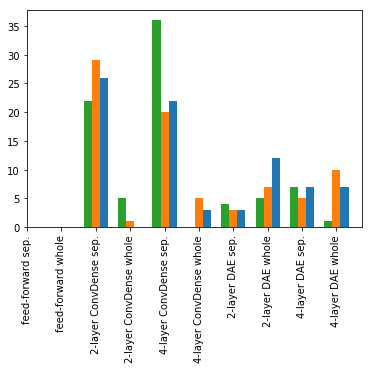

In [16]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def categorical_hist(*dataframes, labels=None, percentage=False):
    ret = []
    width = (1 / len(dataframes) - 0.1)
    offsets = (np.arange(len(dataframes)) - len(dataframes) / 2 + 0.5) * width
    for offset, data in zip(offsets, dataframes):
        cnt = Counter(data)
        print(cnt)
        ret.append(plt.bar(np.array(list(cnt.keys())) - offset, cnt.values(), width=width))
    if labels is not None:
        plt.xticks(np.arange(len(labels)), labels, rotation='vertical')
    return ret

pesq1, pesq2, pesq3 = [], [], []

for k,v in status.items():
    if k.startswith('0-amr-lq-') and not k.endswith("-regularized"):
        pesq1.append(v['PESQ'])
    if k.startswith('0-amr-hq-') and not k.endswith("-regularized"):
        pesq2.append(v['PESQ'])
    if k.startswith('0-gsm-fr-') and not k.endswith("-regularized"):
        pesq3.append(v['PESQ'])

labels = ['feed-forward sep.', 'feed-forward whole',
          '2-layer ConvDense sep.', '2-layer ConvDense whole',
          '4-layer ConvDense sep.', '4-layer ConvDense whole',
          '2-layer DAE sep.', '2-layer DAE whole',
          '4-layer DAE sep.', '4-layer DAE whole']
        
categorical_hist(np.stack(pesq1).argmax(0), np.stack(pesq2).argmax(0), np.stack(pesq3).argmax(0), labels=labels, percentage=True)

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

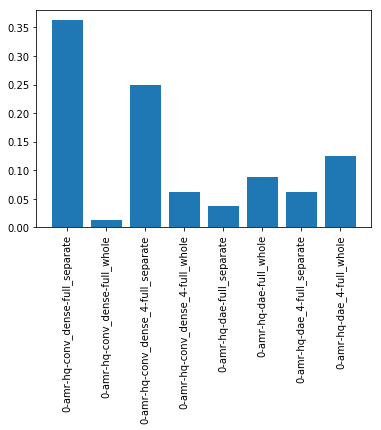

In [49]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

pesq, labels = [], []

for k,v in status.items():
    if k.startswith('0-amr-hq-'):
        pesq.append(v['PESQ'])
        labels.append(k)

def categorical_hist(data, labels=None, percentage=False):
    cnt = Counter(data)
    if labels is not None:
        cnt = {labels[k]: (
            v / len(data) if percentage else v
          ) for k, v in cnt.items()}
    return plt.bar(cnt.keys(), cnt.values())
        
categorical_hist(np.stack(pesq).argmax(0), labels, percentage=True)
plt.xticks(rotation='vertical')

In [50]:
import numpy as np
import os

src = os.path.join(sear_lib.Config.DATASETPATH, "test_source.bin.npy")
gt = os.path.join(sear_lib.Config.DATASETPATH, "test_target.bin.npy")
phase = os.path.join(sear_lib.Config.DATASETPATH, "test_phase.bin.npy")
src, gt, phase = [np.load(x) for x in [src, gt, phase]]

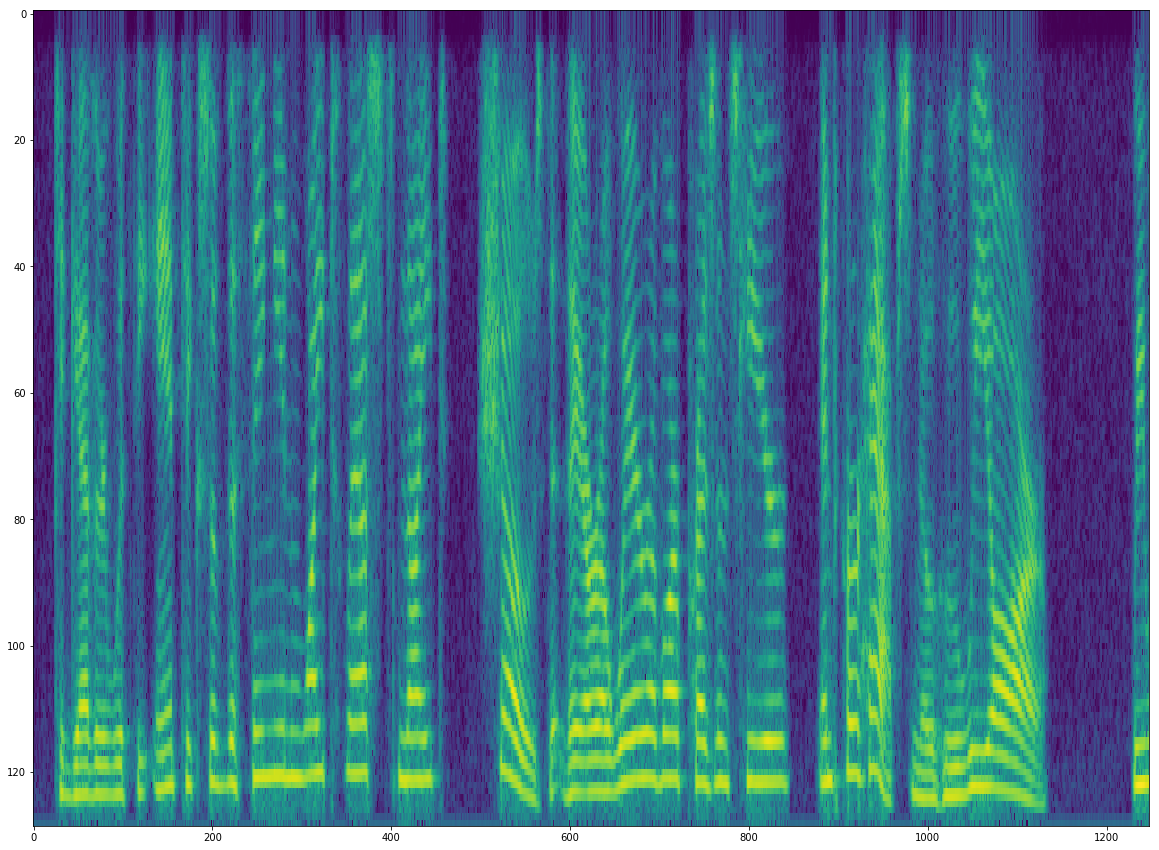

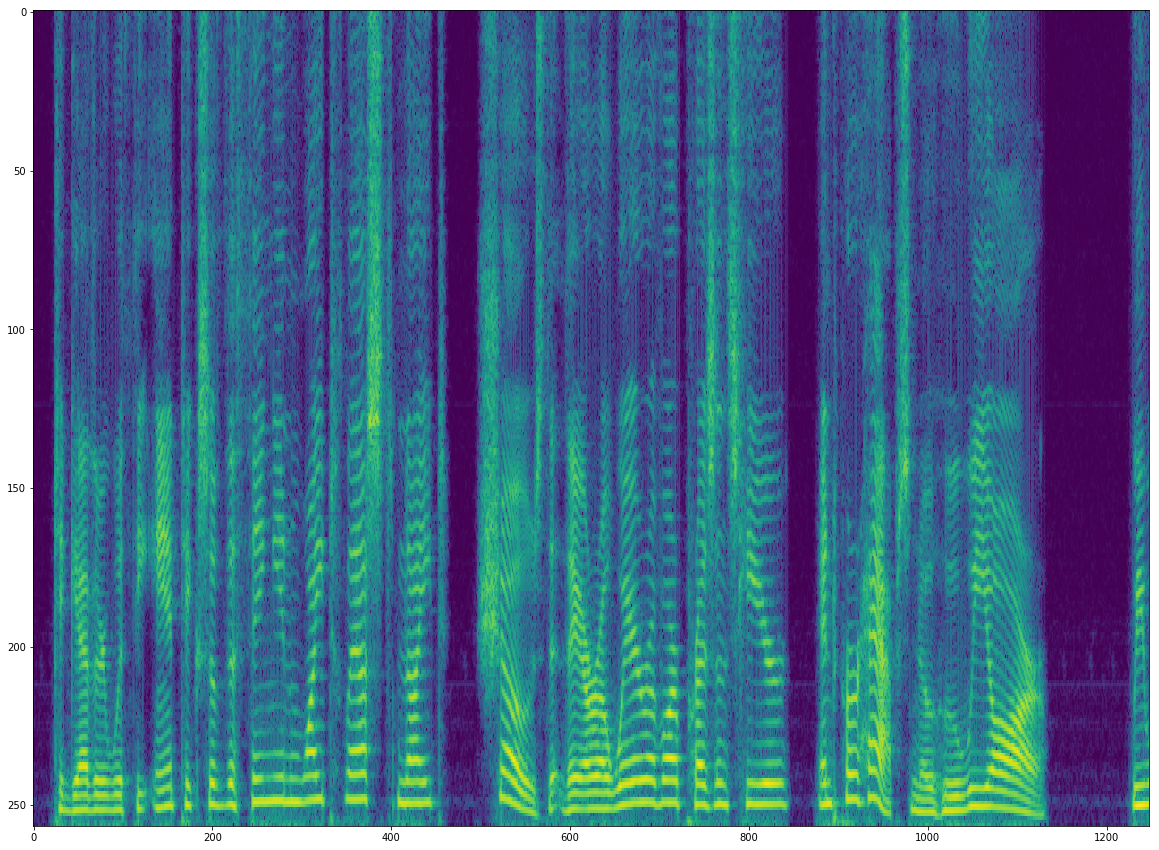

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_spec(spec, log=True, ax=None):
    if spec.dtype in (np.complex64, np.complex128, np.complex):
        spec = -1 * np.log(np.abs(spec)**2 + 2e-12)
    if ax is None:
        plt.figure(figsize=(20, 15))
        return plt.imshow(np.flip(spec.T, 0), aspect='auto')
    return ax.imshow(np.flip(spec.T, 0), aspect='auto')

show_spec(-1 * src[0])
show_spec(-1 * gt[0])

In [55]:
mdl = sear_lib.ModelInstance.load("runs/2019-04-13T18:30:21.050186.zip")

In [56]:
preds = mdl.model.predict(src[:1])

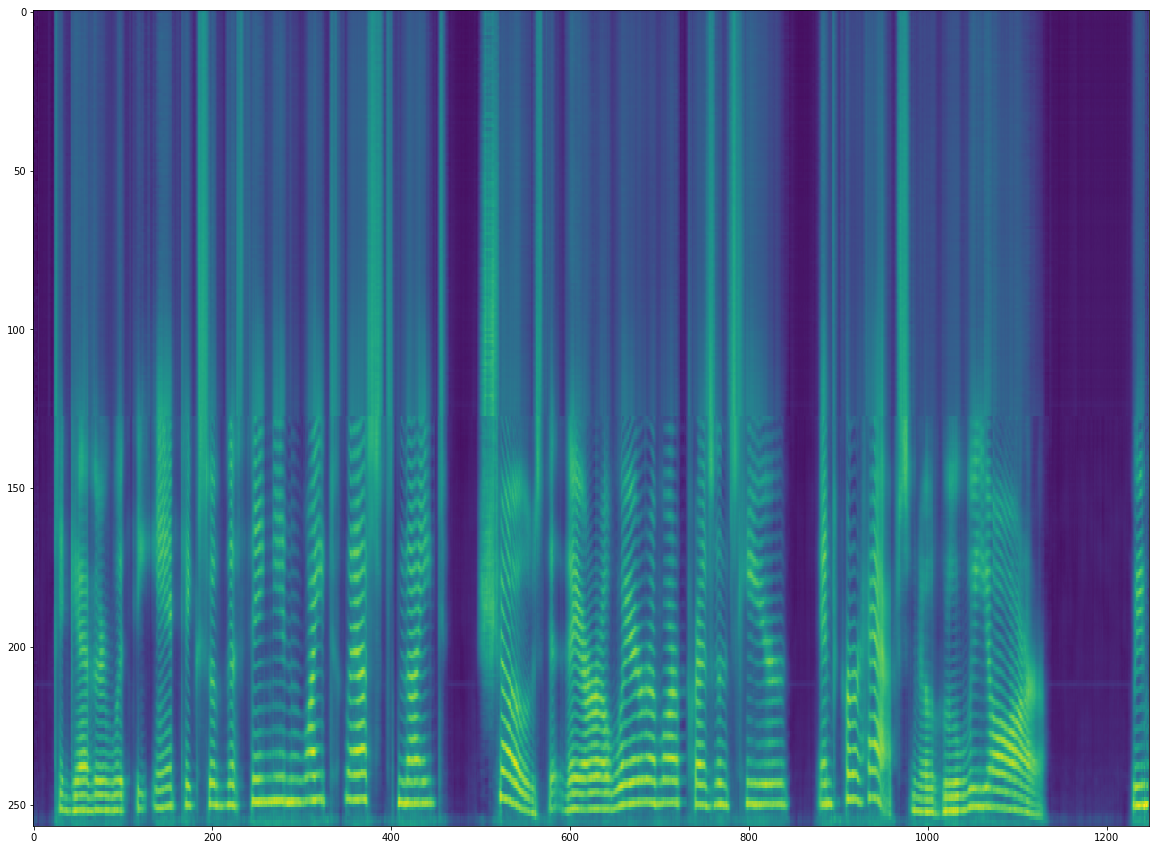

In [57]:
show_spec(-1 * preds[0])

In [58]:
results = [v["PESQ"] for k, v in status.items() if not isinstance(v, bool) and k.startswith("10-amr-lq")]